<a href="https://colab.research.google.com/github/sudhakarmlal/EVA4/blob/master/Session15/MaskModel_Generate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount the Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import cv2
import numpy as np
import os
from glob import glob
%matplotlib inline
#!pip install git+https://github.com/arraiyopensource/kornia

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import io
from itertools import groupby
import cv2
from tqdm.auto import tqdm
from pathlib import Path
from time import time
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset , random_split
from PIL import Image
from torchvision.transforms import transforms
import os
from glob import glob
import torch
import torchvision
from torch import nn
#from kornia.losses import SSIM

## Read the Extracted Data

In [0]:
#BG_DIR = "./gdrive/My Drive/S15/JPG/BG_BG_COLOR/BG_BG"
#FG_DIR = "./gdrive/My Drive/S15/JPG/FG_BG/FG_BG"
#MASK_DIR = "./gdrive/My Drive/S15/JPG/MS_BG/MS_BG"

BG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg"
FG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/fg_jpg"
MASK_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/mask_black_jpg"
DP_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/depth_fg_bg_jpg"
FG_BG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/fg_bg_jpg"

In [0]:
!ls /content/gdrive/'My Drive'/MASK1/batch_images1/depth_fg_bg_jpg

depth_fg_bg_10_100_0_10.jpg  depth_fg_bg_5_100_0_10.jpg
depth_fg_bg_10_100_0_11.jpg  depth_fg_bg_5_100_0_11.jpg
depth_fg_bg_10_100_0_12.jpg  depth_fg_bg_5_100_0_12.jpg
depth_fg_bg_10_100_0_13.jpg  depth_fg_bg_5_100_0_13.jpg
depth_fg_bg_10_100_0_14.jpg  depth_fg_bg_5_100_0_14.jpg
depth_fg_bg_10_100_0_15.jpg  depth_fg_bg_5_100_0_15.jpg
depth_fg_bg_10_100_0_16.jpg  depth_fg_bg_5_100_0_16.jpg
depth_fg_bg_10_100_0_17.jpg  depth_fg_bg_5_100_0_17.jpg
depth_fg_bg_10_100_0_18.jpg  depth_fg_bg_5_100_0_18.jpg
depth_fg_bg_10_100_0_19.jpg  depth_fg_bg_5_100_0_19.jpg
depth_fg_bg_10_100_0_1.jpg   depth_fg_bg_5_100_0_1.jpg
depth_fg_bg_10_100_0_20.jpg  depth_fg_bg_5_100_0_20.jpg
depth_fg_bg_10_100_0_2.jpg   depth_fg_bg_5_100_0_2.jpg
depth_fg_bg_10_100_0_3.jpg   depth_fg_bg_5_100_0_3.jpg
depth_fg_bg_10_100_0_4.jpg   depth_fg_bg_5_100_0_4.jpg
depth_fg_bg_10_100_0_5.jpg   depth_fg_bg_5_100_0_5.jpg
depth_fg_bg_10_100_0_6.jpg   depth_fg_bg_5_100_0_6.jpg
depth_fg_bg_10_100_0_7.jpg   depth_fg_bg_5_100_0_7.jpg

In [0]:
!ls /content/gdrive/'My Drive'/MASK1/batch_images1/mask_black_jpg

bg_mask_10_100_0_10.jpg  bg_mask_3_39_0_4.jpg	 bg_mask_6_69_1_18.jpg
bg_mask_10_100_0_11.jpg  bg_mask_3_39_0_5.jpg	 bg_mask_6_69_1_19.jpg
bg_mask_10_100_0_12.jpg  bg_mask_3_39_0_6.jpg	 bg_mask_6_69_1_1.jpg
bg_mask_10_100_0_13.jpg  bg_mask_3_39_0_7.jpg	 bg_mask_6_69_1_20.jpg
bg_mask_10_100_0_14.jpg  bg_mask_3_39_0_8.jpg	 bg_mask_6_69_1_2.jpg
bg_mask_10_100_0_15.jpg  bg_mask_3_39_0_9.jpg	 bg_mask_6_69_1_3.jpg
bg_mask_10_100_0_16.jpg  bg_mask_3_39_1_10.jpg	 bg_mask_6_69_1_4.jpg
bg_mask_10_100_0_17.jpg  bg_mask_3_39_1_11.jpg	 bg_mask_6_69_1_5.jpg
bg_mask_10_100_0_18.jpg  bg_mask_3_39_1_12.jpg	 bg_mask_6_69_1_6.jpg
bg_mask_10_100_0_19.jpg  bg_mask_3_39_1_13.jpg	 bg_mask_6_69_1_7.jpg
bg_mask_10_100_0_1.jpg	 bg_mask_3_39_1_14.jpg	 bg_mask_6_69_1_8.jpg
bg_mask_10_100_0_20.jpg  bg_mask_3_39_1_15.jpg	 bg_mask_6_69_1_9.jpg
bg_mask_10_100_0_2.jpg	 bg_mask_3_39_1_16.jpg	 bg_mask_6_70_0_10.jpg
bg_mask_10_100_0_3.jpg	 bg_mask_3_39_1_17.jpg	 bg_mask_6_70_0_11.jpg
bg_mask_10_100_0_4.jpg	 bg_mask_3_39_1

In [0]:
from tqdm import tqdm
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2

In [0]:
def get_img_file_names(path):
  img_file_names =[]
  for root, dirs, files in os.walk(path):
    for filename in files:
      #if img_file is not None:
      #print(filename)
      img_file_names.append(path + '/' + filename)  
  return img_file_names

In [0]:
bg_file_names = get_img_file_names(BG_DIR)
fg_file_names =get_img_file_names(FG_DIR)
mask_file_names =get_img_file_names(MASK_DIR)
dp_file_names =get_img_file_names(DP_DIR)
fg_bg_file_names =get_img_file_names(FG_BG_DIR)

In [0]:
mask_file_names =get_img_file_names(MASK_DIR)
print(len(mask_file_names))

40000


In [0]:
dp_file_names =get_img_file_names(DP_DIR)

In [0]:
print(len(dp_file_names))

40000


In [0]:
FG_BG_DIR = "/content/gdrive/My Drive/MASK1/batch_images1/fg_bg_jpg1"

In [0]:
fg_bg_file_names =get_img_file_names(FG_BG_DIR)

In [0]:
print(len(fg_bg_file_names))

40000


In [0]:
print(len(bg_file_names))
print(len(fg_file_names))
#print(len(mask_file_names))
#print(len(dp_file_names))

100
10


## Map the Data for Fg_Bg,Fg,Bg,Depth and Mask Images

In [0]:
forground_image_names = []
bg_mask_img_names = []
bg_dp_img_names = []
bg_fg_bg_img_names = []

mask_img_names  = []
dp_img_names = []
fg_images_names = []
fg_bg_img_names = []

for i in range(len(fg_file_names)):
  fg_str = fg_file_names[i].split('/')[-1]
  fg_name = fg_str[0:fg_str.rfind('.jpg')]
  print(fg_name)
  forground_image_names.append(fg_name)

for i in range(len(forground_image_names)):
  for j in range(40):
    print(bg_file_names[j])
    bg_str = bg_file_names[j].split('_')[-1]
    print(bg_str[0:bg_str.rfind('.jpg')])
    bg_num  = bg_str[0:bg_str.rfind('.jpg')]
    search_str_mask ="bg_mask"+forground_image_names[i][6:]
    search_str_mask = search_str_mask + "_" +bg_num+"_"
    print(search_str_mask)
    search_str_depth_fg_bg ="depth_fg_bg"+forground_image_names[i][6:]
    search_str_depth_fg_bg =search_str_depth_fg_bg + "_" +bg_num +"_"
    print(search_str_depth_fg_bg)

    search_str_fg_bg ="fg_bg"+forground_image_names[i][6:]
    search_str_fg_bg =search_str_fg_bg + "_" +bg_num +"_"
    print(search_str_fg_bg)
  
    for k in range(len(mask_file_names)):
      mask_str = mask_file_names[k].split('/')[-1]
      fg_depth_bg_str =dp_file_names[k].split('/')[-1]
      fg_bg_str = fg_bg_file_names[k].split('/')[-1]
      if mask_str.startswith(search_str_mask):
        mask_img_names.append(mask_file_names[k])
        bg_mask_img_names.append(bg_file_names[j])
      if fg_bg_str.startswith(search_str_fg_bg):
        fg_bg_img_names.append(fg_bg_file_names[k])
        bg_fg_bg_img_names.append(bg_file_names[j])
        #fg_images_names.append(fg_file_names[i])  
      if fg_depth_bg_str.startswith(search_str_depth_fg_bg):
        dp_img_names.append(dp_file_names[k])
        bg_dp_img_names.append(bg_file_names[j])
        fg_images_names.append(fg_file_names[i]) 

  #fg_name = fg_str[0:fg_str.rfind('.jpg')]
print(len(fg_images_names))
print(len(dp_img_names))
print(len(mask_img_names))
print(len(bg_mask_img_names))
print(len(bg_dp_img_names))
print(len(fg_bg_img_names))
print(len(bg_fg_bg_img_names))

print(bg_mask_img_names[3084])
print(bg_dp_img_names[3084])  
print(bg_fg_bg_img_names[3084])
print(fg_images_names[3084])
print(mask_img_names[3084])
print(dp_img_names[3084])
print(fg_bg_img_names[3084])



fg_img_6
fg_img_3
fg_img_8
fg_img_2
fg_img_9
fg_img_1
fg_img_7
fg_img_5
fg_img_4
fg_img_10
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_85.jpg
85
bg_mask_6_85_
depth_fg_bg_6_85_
fg_bg_6_85_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_29.jpg
29
bg_mask_6_29_
depth_fg_bg_6_29_
fg_bg_6_29_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_46.jpg
46
bg_mask_6_46_
depth_fg_bg_6_46_
fg_bg_6_46_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_79.jpg
79
bg_mask_6_79_
depth_fg_bg_6_79_
fg_bg_6_79_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_16.jpg
16
bg_mask_6_16_
depth_fg_bg_6_16_
fg_bg_6_16_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_3.jpg
3
bg_mask_6_3_
depth_fg_bg_6_3_
fg_bg_6_3_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_27.jpg
27
bg_mask_6_27_
depth_fg_bg_6_27_
fg_bg_6_27_
/content/gdrive/My Drive/MASK1/batch_images1/bg_jpg/bg_img_69.jpg
69
bg_mask_6_69_
depth_fg_bg_6_69_
fg_bg_6_69_
/content/g

## Define the transformer

In [0]:
scale_transform = transforms.Compose([
                  transforms.Resize((64,64)),
                  transforms.Grayscale(num_output_channels=1),
                  transforms.ToTensor(),
])

## Define the master dataset

In [0]:
class MasterDataset(Dataset):
  def __init__(self,  transform= None, bg_files= None, fg_bg_files= None, ms_bg_files= None, dp_files= None):
    self.bg_files= bg_files
    self.fg_bg_files= fg_bg_files
    self.ms_bg_files= ms_bg_files
    self.dp_files= dp_files
    #self.ms_bg_files= list([y for x in os.walk(MASK_DIR) for y in glob(os.path.join(x[0], '*.jpg'))]) 
    #self.bg_files= list(BG_DIR.glob('*.jpg'))   
    self.transform = transform
  

  def __len__(self):
    return len(self.bg_files)

  def __getitem__(self,index):
    bg_image = Image.open(self.bg_files[index])
    fg_bg_image = Image.open(self.fg_bg_files[index])
    ms_bg_image = Image.open(self.ms_bg_files[index])
    dp_image = Image.open(self.dp_files[index])
    if self.transform:
      bg_image = self.transform(bg_image)
      fg_bg_image = self.transform(fg_bg_image)
      ms_bg_image = self.transform(ms_bg_image)
      dp_image = self.transform(dp_image)
    return {'bg_image' : bg_image,'fg_bg_image' : fg_bg_image,'ms_bg_image' : ms_bg_image, 'dp_image' : dp_image }

In [0]:
mean, std = torch.tensor([0.485,0.456,0.406])*255, torch.tensor([0.229,0.224,0.225])*255
train_transform = transforms.Compose([
                  transforms.Resize((64,64)),
                  transforms.Grayscale(num_output_channels=3),
                  transforms.ToTensor()
])

## Create Training DataSet

In [0]:
train_ds = MasterDataset(train_transform, bg_dp_img_names, fg_bg_img_names, mask_img_names,dp_img_names)

In [0]:
print(len(train_ds.bg_files))
print(len(train_ds.ms_bg_files))
print(len(train_ds.fg_bg_files))
print(len(train_ds.dp_files))

16000
16000
16000
16000


In [0]:
[(k, v.shape) for k,v in train_ds[1].items()]

[('bg_image', torch.Size([3, 64, 64])),
 ('fg_bg_image', torch.Size([3, 64, 64])),
 ('ms_bg_image', torch.Size([3, 64, 64])),
 ('dp_image', torch.Size([3, 64, 64]))]

## Load it to train dataloader

In [0]:
train_dl = DataLoader(train_ds, batch_size=16, shuffle = True, pin_memory=True)
sample = next( iter(train_dl))
type(sample)

dict

In [0]:
[(k, v.shape) for k,v in sample.items()]

[('bg_image', torch.Size([16, 3, 64, 64])),
 ('fg_bg_image', torch.Size([16, 3, 64, 64])),
 ('ms_bg_image', torch.Size([16, 3, 64, 64])),
 ('dp_image', torch.Size([16, 3, 64, 64]))]

## Define Show Image Utility for showing output images

In [0]:
#imgs= sample["ms_bg_image"]
#grid_tensor = torchvision.utils.make_grid(imgs,2)
#grid_image= grid_tensor.permute(1,2,0)
def show(tensors, figsize=(10,10), *args, **kwargs):
  try:
    tensors = tensors.detach().cpu()
  except: 
    pass
  grid_tensors= torchvision.utils.make_grid(tensors,*args, **kwargs)
  grid_image= grid_tensors.permute(1,2,0)
  plt.figure(figsize=figsize)
  plt.imshow(grid_image)
  plt.xticks([])
  plt.yticks([])
  plt.show()

def show_pred(tensors,*args, **kwargs):
  tensors= (tensors * std[None, :, None, None])+ mean[None, : , None, None]
  show(tensors, *args, **kwargs)

#show(imgs, nrow=4)

## Define the Model

In [0]:
class ConvGen(nn.Module):
    def __init__(self):
        super(ConvGen, self).__init__()

        self.convblock1 = nn.Sequential(
            nn.Conv2d(3,32,3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(),
        )
        self.convblock2 = nn.Sequential(
            nn.Conv2d(32,32,3, stride=1, padding=1, bias=False, groups=32),
            nn.Conv2d(32,64,1, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        self.convblock3 = nn.Sequential(
            nn.Conv2d(128,256,3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
        )
        self.convblock4 = nn.Sequential(
            nn.Conv2d(256,3,3, stride=1, padding=1, bias=False)            
        )
        
    def forward(self, x):
        bg_image = x["bg_image"]
        fg_bg_image = x["fg_bg_image"]        
        bg_image = self.convblock2(self.convblock1(bg_image))
        fg_bg_image = self.convblock2(self.convblock1(fg_bg_image))
        f= torch.cat([bg_image,fg_bg_image], dim=1)
        f = self.convblock4(self.convblock3(f))
        return f

In [0]:
from torchsummary import summary
model = ConvGen()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model= model.to(device)
print(model)
#summary(model, (3, 64, 64))

ConvGen(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (convblock2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
    (1): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (convblock3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (convblock4): Sequential(
    (0): Conv2d(256, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
)


In [0]:
criterion = nn.BCEWithLogitsLoss()
#criterion = SSIM(3, reduction="mean" )
optim = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9, weight_decay = 1e-5)

In [0]:
!pwd

/content


In [0]:
#PATH= './saved_models/'
#model.load_state_dict(torch.load(PATH + '0.pth'))
PATH= Path('./gdrive/My Drive/MASK1/S15/saved_models/updated2')
PATH.mkdir(exist_ok= True)

## Train the Model

In [0]:
def train( model, criterion, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  for batch_idx, data in enumerate(pbar):
    data["bg_image"] = data["bg_image"].to(device)
    data["fg_bg_image"] = data["fg_bg_image"].to(device)
    data["ms_bg_image"] = data["ms_bg_image"].to(device)
    data["dp_image"] = data["dp_image"].to(device)
    optimizer.zero_grad()
    output=model(data)
    #print(type(output))
    #loss= criterion(output,data["ms_bg_image"])
    loss1 = criterion(output,data["ms_bg_image"])
    loss2 = criterion(output,data["dp_image"])
    loss = 2*loss1 + loss2
    pbar.set_description(desc= f'loss={loss.item()} l1={loss1.item()} l2={loss2.item()}')
    loss.backward()
    optimizer.step()
    if batch_idx % 50 == 0:
      print('Train Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,batch_idx*len(data),len(train_loader.dataset), 
                                                                      100.*batch_idx/len(train_loader), loss.item()))
    if batch_idx % 400 == 0:
    #  show_pred(output.detach().cpu,nrow=2)
      show(output,nrow=4)
    if batch_idx % 50 == 0:
      torch.save(model.state_dict(), PATH/f"{batch_idx}.pth")  

In [0]:
from torch.optim.lr_scheduler import StepLR
#device = torch.device('cuda:0')
#model= model.to(device)
scheduler= StepLR(optim, step_size=1, gamma= 0.01)

## Run the Epochs

loss=2.219132661819458 l1=0.7526234984397888 l2=0.7138856649398804:   0%|          | 0/1000 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 1 [0/16000 (0%)]	Loss: 2.219133


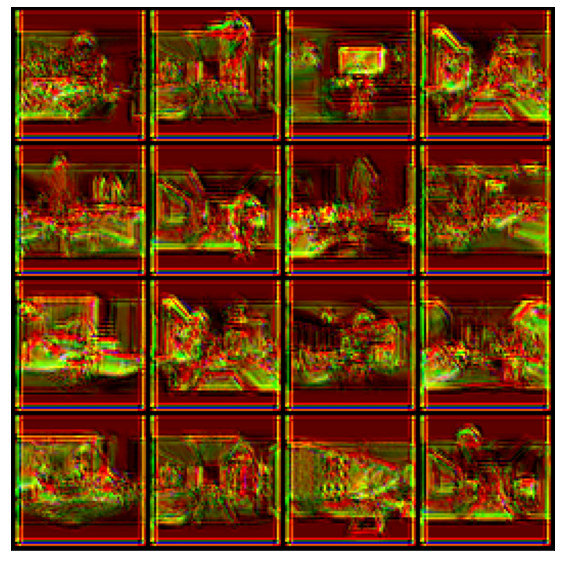

loss=1.4801459312438965 l1=0.3337208926677704 l2=0.8127040863037109:   5%|▌         | 51/1000 [00:14<04:25,  3.58it/s]

Train Epoch : 1 [200/16000 (5%)]	Loss: 1.480146


loss=1.4434123039245605 l1=0.3207007348537445 l2=0.8020108938217163:  10%|█         | 101/1000 [00:28<04:12,  3.56it/s]

Train Epoch : 1 [400/16000 (10%)]	Loss: 1.443412


loss=1.4882164001464844 l1=0.3375805616378784 l2=0.8130552172660828:  15%|█▌        | 151/1000 [00:42<04:03,  3.48it/s]

Train Epoch : 1 [600/16000 (15%)]	Loss: 1.488216


loss=1.4815728664398193 l1=0.3279711604118347 l2=0.8256305456161499:  20%|██        | 201/1000 [00:56<03:50,  3.46it/s]

Train Epoch : 1 [800/16000 (20%)]	Loss: 1.481573


loss=1.4509449005126953 l1=0.32036930322647095 l2=0.8102063536643982:  25%|██▌       | 251/1000 [01:10<03:34,  3.49it/s]

Train Epoch : 1 [1000/16000 (25%)]	Loss: 1.450945


loss=1.4799100160598755 l1=0.3203262686729431 l2=0.8392574787139893:  30%|███       | 301/1000 [01:24<03:16,  3.56it/s]

Train Epoch : 1 [1200/16000 (30%)]	Loss: 1.479910


loss=1.4246413707733154 l1=0.3154379725456238 l2=0.7937654256820679:  35%|███▌      | 351/1000 [01:38<03:00,  3.60it/s]

Train Epoch : 1 [1400/16000 (35%)]	Loss: 1.424641


loss=1.4495105743408203 l1=0.3205187916755676 l2=0.8084729909896851:  40%|████      | 400/1000 [01:52<02:47,  3.57it/s] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 1 [1600/16000 (40%)]	Loss: 1.449511


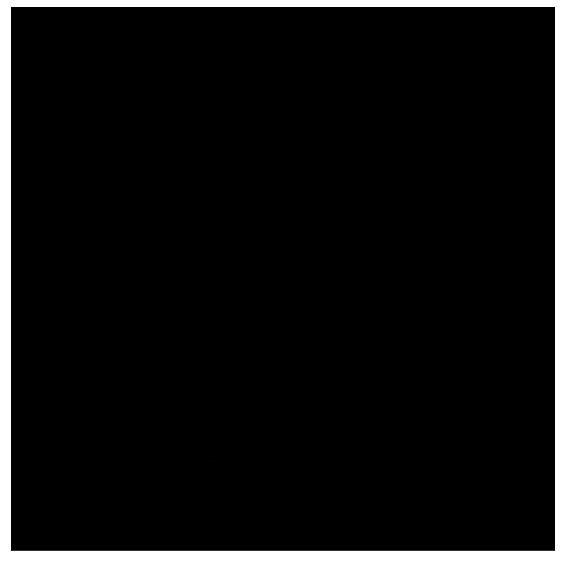

loss=1.4460909366607666 l1=0.2964918613433838 l2=0.8531071543693542:  45%|████▌     | 451/1000 [02:06<02:37,  3.49it/s]

Train Epoch : 1 [1800/16000 (45%)]	Loss: 1.446091


loss=1.4712276458740234 l1=0.31255683302879333 l2=0.846113920211792:  50%|█████     | 501/1000 [02:20<02:23,  3.48it/s]

Train Epoch : 1 [2000/16000 (50%)]	Loss: 1.471228


loss=1.4367451667785645 l1=0.30467259883880615 l2=0.8273999691009521:  55%|█████▌    | 551/1000 [02:34<02:07,  3.52it/s]

Train Epoch : 1 [2200/16000 (55%)]	Loss: 1.436745


loss=1.447755217552185 l1=0.31305813789367676 l2=0.8216389417648315:  60%|██████    | 601/1000 [02:48<01:51,  3.58it/s]

Train Epoch : 1 [2400/16000 (60%)]	Loss: 1.447755


loss=1.4562194347381592 l1=0.31706100702285767 l2=0.8220974206924438:  65%|██████▌   | 651/1000 [03:02<01:40,  3.47it/s]

Train Epoch : 1 [2600/16000 (65%)]	Loss: 1.456219


loss=1.46029794216156 l1=0.31426846981048584 l2=0.8317610025405884:  70%|███████   | 701/1000 [03:16<01:26,  3.48it/s]

Train Epoch : 1 [2800/16000 (70%)]	Loss: 1.460298


loss=1.4618065357208252 l1=0.3100607991218567 l2=0.8416849374771118:  75%|███████▌  | 751/1000 [03:30<01:09,  3.57it/s]

Train Epoch : 1 [3000/16000 (75%)]	Loss: 1.461807


loss=1.4554699659347534 l1=0.32463592290878296 l2=0.8061981201171875:  80%|████████  | 800/1000 [03:45<01:01,  3.27it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Epoch : 1 [3200/16000 (80%)]	Loss: 1.455470


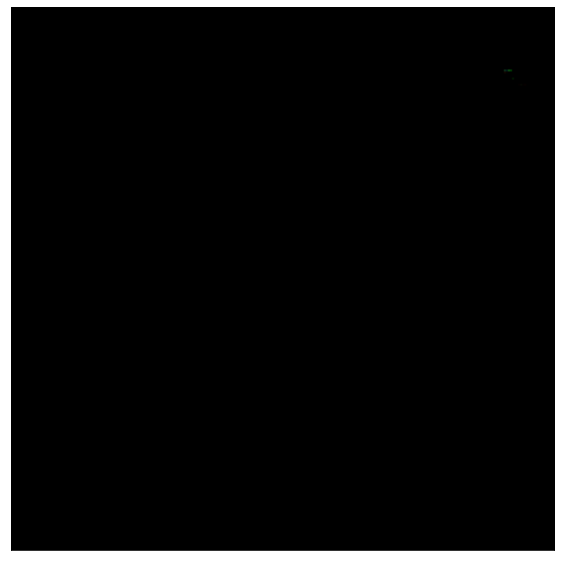

loss=1.4756593704223633 l1=0.33013567328453064 l2=0.8153880834579468:  85%|████████▌ | 851/1000 [04:00<00:42,  3.52it/s]

Train Epoch : 1 [3400/16000 (85%)]	Loss: 1.475659


loss=1.4719829559326172 l1=0.3090858459472656 l2=0.8538112640380859:  90%|█████████ | 901/1000 [04:14<00:28,  3.53it/s]

Train Epoch : 1 [3600/16000 (90%)]	Loss: 1.471983


loss=1.446725845336914 l1=0.3085871934890747 l2=0.8295513987541199:  95%|█████████▌| 951/1000 [04:28<00:13,  3.50it/s]

Train Epoch : 1 [3800/16000 (95%)]	Loss: 1.446726


loss=1.4176452159881592 l1=0.30290865898132324 l2=0.8118278980255127: 100%|██████████| 1000/1000 [04:41<00:00,  3.55it/s]


In [0]:
for epoch in range(1,2):
  train(model, criterion,device, train_dl, optim, epoch)
  scheduler.step()


In [0]:
print(sum(p.numel() for p in model.parameters() if p.requires_grad))